In [ ]:
!pip install -U pymoo

     |████████████████████████████████| 2.5 MB 5.4 MB/s 
     |████████████████████████████████| 239 kB 40.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pymoo
from pymoo.core.problem import Problem
import numpy as np

In [ ]:
## imports
import numpy as np
import math

# insert other imports

In [ ]:
def gaussian(x, mean, var):
    return math.exp(-(x-mean)**2/(2*var))

In [ ]:
## objective functions

def job(s):  
    job = (9*(s.acads)**2 + 4*(s.research)**2 + 3*(s.pors)**2 + 5*(s.tech_team)**2 +  5*(s.tech_club)**2)*np.exp(-( (s.sleep-49)**2 / ( 2.0 * 14**2 ) ) ) # mu = 49, sigma = 14
    return job
    
def gradstudy(s):
    gradstudy = (np.exp(-( (s.sleep-49)**2 / ( 2.0 * 14**2 ) ) ))*(8*(s.acads)**2+10*(s.research)**2+5*(s.tech_team)**2+5*(s.tech_club)**2)
    return gradstudy

def health(s): 
    health = (np.exp(-( (s.sleep-49)**2 / ( 2.0 * 7**2 ) ) ))*(1 + s.sports**2/5 + (1 - np.exp(-s.leisure/15)))
    return health

def social(s):
    social = (np.exp(-( (s.sleep-49)**2 / ( 2.0 * 14**2 ) ) ))*((s.sports**2)+7*(s.pors**2)+3*(s.tech_team)**2+3*(s.tech_club)**2+7*(s.nc_club**2)+7*(s.cult**2))
    return social

def explore(s):
    explore = (np.exp(-( (s.sleep-49)**2 / ( 2.0 * 14**2 ) ) ))*((5*(s.sports**2)+5*(s.pors**2)+5*(s.tech_team)**2+5*(s.tech_club)**2 +5*(s.nc_club**2)+5*(s.cult**2)+5*(s.acads**2)+5*(s.research**2)))
    return explore
##money 


In [ ]:
class student():
    def __init__(self, id, num_obj, objs):
        
        self.acads = None
        self.sports = None
        self.research = None
        self.pors = None
        self.tech_team = None
        self.tech_club = None
        self.nc_club = None
        self.cult = None
        self.leisure = None
        self.sleep=None 
        
        self.id=id

        ## objective functions
        self.num_obj = num_obj
        self.objectives = objs   ## objs is a list of functions

In [ ]:
# # List Of Student Objects
# student_list = []
# student_list.append(student(id = 0,num_obj = 1,objs = [job,health,social]))
# student_list.append(student(id = 1,num_obj = 1,objs = [gradstudy,explore,social]))
# student_list.append(student(id = 2,num_obj = 1,objs = [job,health,social]))
# student_list.append(student(id = 3,num_obj = 1,objs = [social,explore,job,health]))
# student_list.append(student(id = 4,num_obj = 2,objs = [explore,gradstudy]))
# print(student_list)

# n_obj = 0
# for s in student_list:
#     n_obj += s.num_obj
# List Of Student Objects
student_list = []
student_list.append(student(id = 0,num_obj = 1,objs = [job]))
student_list.append(student(id = 1,num_obj = 1,objs = [gradstudy]))
student_list.append(student(id = 2,num_obj = 1,objs = [health]))
student_list.append(student(id = 3,num_obj = 1,objs = [social]))
student_list.append(student(id = 4,num_obj = 2,objs = [explore,social]))
print(student_list)

n_obj = 0
for s in student_list:
    n_obj += s.num_obj

[<__main__.student object at 0x7f80afaeb310>, <__main__.student object at 0x7f80afaeb3d0>, <__main__.student object at 0x7f80afaeb410>, <__main__.student object at 0x7f80afaeb490>, <__main__.student object at 0x7f80afaeb4d0>]


In [ ]:
# method 1
# class CollegeLife(Problem):
#     def __init__(self, students, graph):
#         super().__init__(n_var=50, n_obj=n_obj, n_constr=7, xl=0.0, xu=60.0) ## xu was 168
#         ## graph weights
#         ## students index starts from 0
#         self.students = students
#         self.graph = graph

#     def _evaluate(self, x, out, *args, **kwargs):
#         # op = None
#         # g_stack = None
#         flist=[]
#         glist = []
#         for s in self.students:
#          s.acads = x[:, s.id*10 + 0]
#          s.sports=x[:, s.id*10 + 1]
#          s.research=x[:, s.id*10 + 2] 
#          s.pors=x[:, s.id*10 + 3]
#          s.tech_team=x[:, s.id*10 + 4]
#          s.tech_club=x[:, s.id*10 + 5]
#          s.nc_club=x[:, s.id*10 + 6]
#          s.cult=x[:, s.id*10 + 7]
#          s.leisure=x[:, s.id*10 + 8]
#          s.sleep = x[:, s.id*10 + 9]
#          temp=s
#          relations = self.graph.adjacent_node_attribute(s.id)
#          for i in relations:
#            a,y=i
#            identity = a
#            temp.acads += y*x[:, identity*10 + 0]
#            temp.sports += y*x[:, identity*10 + 1]
#            temp.research += y*x[:, identity*10 + 2]
#            temp.pors += y*x[:, identity*10 + 3]
#            temp.tech_team +=y*x[:, identity*10 + 4]
#            temp.tech_club += y*x[:, identity*10 + 5]
#            temp.nc_club +=y*x[:, identity*10 + 6]
#            temp.cult += y*x[:, identity*10 + 7]
#            temp.leisure += y*x[:, identity*10 + 8]
#            temp.sleep += y*x[:, identity*10 + 9]
        
#          ## constraints
#          g1 = s.acads + s.sports + s.research + s.pors + s.tech_team + s.tech_club + s.nc_club + s.cult + s.leisure + s.sleep - 168
#          ## the mentioned activities comprise at least 100 hrs per week
#          g2 = -(s.acads + s.sports + s.research + s.pors + s.tech_team + s.tech_club + s.nc_club + s.cult + s.leisure + s.sleep - 120)
#          g3 = -(s.acads - 18)
#          g4 = (s.acads - 54)
#          g5 = (s.pors + s.tech_team + s.tech_club + s.nc_club - 50)
#          g6 = -(s.sleep - 35)
#          g7 = -(s.leisure - 10)
#         #  glist.append([g1, g2, g3, g4, g5, g6, g7])
#          glist.append(g1)
#          glist.append(g2)
#          glist.append(g3)
#          glist.append(g4)
#          glist.append(g5)
#          glist.append(g6)
#          glist.append(g7)
         
#          for f in s.objectives:
#            t=-1*f(temp)  ## to convert to a minimization problem
#         #    op=np.column_stack([op, t])
#            flist.append(t)

       
#         out["F"] = np.column_stack(flist)
#         out["G"] = np.column_stack(glist)
#method 2
# class CollegeLife(Problem):
#     def __init__(self, students, graph):
#         super().__init__(n_var=50, n_obj=n_obj, n_constr=7, xl=0.0, xu=60.0) ## xu was 168
#         ## graph weights
#         ## students index starts from 0
#         self.students = students
#         self.graph = graph

#     def _evaluate(self, x, out, *args, **kwargs):
#         # op = None
#         # g_stack = None
#         flist=[]
#         glist = []
#         for s in self.students:
#          s.acads = x[:, s.id*10 + 0]
#          s.sports=x[:, s.id*10 + 1]
#          s.research=x[:, s.id*10 + 2] 
#          s.pors=x[:, s.id*10 + 3]
#          s.tech_team=x[:, s.id*10 + 4]
#          s.tech_club=x[:, s.id*10 + 5]
#          s.nc_club=x[:, s.id*10 + 6]
#          s.cult=x[:, s.id*10 + 7]
#          s.leisure=x[:, s.id*10 + 8]
#          s.sleep = x[:, s.id*10 + 9]
#          temp=s
#          relations = self.graph.adjacent_node_attribute(s.id)
#          for i in relations:
#            a,y=i
#            identity = a
#            temp.acads += y*(x[:, identity*10 + 0]-temp.acads)
#            temp.sports += y*(x[:, identity*10 + 1]-temp.sports)
#            temp.research += y*(x[:, identity*10 + 2]-temp.research)
#            temp.pors += y*(x[:, identity*10 + 3]-temp.pors)
#            temp.tech_team +=y*(x[:, identity*10 + 4]-temp.tech_team)
#            temp.tech_club += y*(x[:, identity*10 + 5]-temp.tech_club)
#            temp.nc_club +=y*(x[:, identity*10 + 6]-temp.nc_club)
#            temp.cult += y*(x[:, identity*10 + 7]-temp.cult)
#            temp.leisure += y*(x[:, identity*10 + 8]-temp.leisure)
#            temp.sleep += y*(x[:, identity*10 + 9]-temp.sleep)
        
#          ## constraints
#          g1 = s.acads + s.sports + s.research + s.pors + s.tech_team + s.tech_club + s.nc_club + s.cult + s.leisure + s.sleep - 168
#          ## the mentioned activities comprise at least 100 hrs per week
#          g2 = -(s.acads + s.sports + s.research + s.pors + s.tech_team + s.tech_club + s.nc_club + s.cult + s.leisure + s.sleep - 120)
#          g3 = -(s.acads - 18)
#          g4 = (s.acads - 54)
#          g5 = (s.pors + s.tech_team + s.tech_club + s.nc_club - 50)
#          g6 = -(s.sleep - 35)
#          g7 = -(s.leisure - 10)
#         #  glist.append([g1, g2, g3, g4, g5, g6, g7])
#          glist.append(g1)
#          glist.append(g2)
#          glist.append(g3)
#          glist.append(g4)
#          glist.append(g5)
#          glist.append(g6)
#          glist.append(g7)
         
#          for f in s.objectives:
#            t=-1*f(temp)  ## to convert to a minimization problem
#         #    op=np.column_stack([op, t])
#            flist.append(t)

       
#         out["F"] = np.column_stack(flist)
#         out["G"] = np.column_stack(glist)
#method 3 
class CollegeLife(Problem):
    def __init__(self, students, graph):
        super().__init__(n_var=50, n_obj=n_obj, n_constr=7, xl=0.0, xu=60.0) ## xu was 168
        ## graph weights
        ## students index starts from 0
        self.students = students
        self.graph = graph

    def _evaluate(self, x, out, *args, **kwargs):
        # op = None
        # g_stack = None
        flist=[]
        glist = []
        for s in self.students:
         s.acads = x[:, s.id*10 + 0]
         s.sports=x[:, s.id*10 + 1]
         s.research=x[:, s.id*10 + 2] 
         s.pors=x[:, s.id*10 + 3]
         s.tech_team=x[:, s.id*10 + 4]
         s.tech_club=x[:, s.id*10 + 5]
         s.nc_club=x[:, s.id*10 + 6]
         s.cult=x[:, s.id*10 + 7]
         s.leisure=x[:, s.id*10 + 8]
         s.sleep = x[:, s.id*10 + 9]
         temp=s
         relations = self.graph.adjacent_node_attribute(s.id)
         for i in relations:
           a,y=i
           identity = a
           temp.acads =(temp.acads + y*x[:, identity*10 + 0])/(1+y)
           temp.sports=   (temp.sports+y*x[:, identity*10 + 1])/(1+y)
           temp.research =      (temp.research +y*x[:, identity*10 + 2])/(1+y)
           temp.pors = (temp.pors +y*x[:, identity*10 + 3])/(1+y)
           temp.tech_team =    (temp.tech_team +y*x[:, identity*10 + 4])/(1+y)
           temp.tech_club =    (temp.tech_club + y*x[:, identity*10 + 5])/(1+y)
           temp.nc_club =    (temp.nc_club +y*x[:, identity*10 + 6])/(1+y)
           temp.cult =      (temp.cult +y*x[:, identity*10 + 7])/(1+y)
           temp.leisure = (temp.leisure +y*x[:, identity*10 + 8])/(1+y)
           temp.sleep = (temp.sleep +y*x[:, identity*10 + 9])/(1+y)
        
         ## constraints
         g1 = s.acads + s.sports + s.research + s.pors + s.tech_team + s.tech_club + s.nc_club + s.cult + s.leisure + s.sleep - 168
         ## the mentioned activities comprise at least 100 hrs per week
         g2 = -(s.acads + s.sports + s.research + s.pors + s.tech_team + s.tech_club + s.nc_club + s.cult + s.leisure + s.sleep - 100)
         g3 = -(s.acads - 18)
         g4 = (s.acads - 54)
         g5 = (s.pors + s.tech_team + s.tech_club + s.nc_club - 50)
         g6 = -(s.sleep - 35)
         g7 = -(s.leisure - 10)
        #  glist.append([g1, g2, g3, g4, g5, g6, g7])
         glist.append(g1)
         glist.append(g2)
         glist.append(g3)
         glist.append(g4)
         glist.append(g5)
         glist.append(g6)
         glist.append(g7)
         
         for f in s.objectives:
           t=-1*f(temp)  ## to convert to a minimization problem
        #    op=np.column_stack([op, t])
           flist.append(t)

       
        out["F"] = np.column_stack(flist)
        out["G"] = np.column_stack(glist)

In [ ]:
class influence_graph():
    '''
    two approaches for creating the graph:
        1. start with fully connected graph with all weights zero.
        and then the user will give the non zero weights between
        two vertices

        2. start with nothing. the user will input the two vertices
        between which an edge has to be created along with the weight
        of that edge


    for approaches of data structure refer naveen garg slides :)
    '''
    def __init__(self,vertices):
        self.V= vertices #No. of vertices
        self.adj = [[] for i in range(vertices)] 
   
    # function to add an edge to graph
    def addEdge(self, u, v, wt):
      
      self.adj[u].append([v, wt])
      self.adj[v].append([u, wt])

    def printGraph(self, V):
      
      v, w = 0, 0
      for u in range(V):
          print("Node", u, "makes an edge with")
    
          for it in self.adj[u]:
              v = it[0]
              w = it[1]
              print("\tNode", v, "with edge weight =", w)
                
          print()
    def adjacent_node_attribute(self, node):
        ans = []
        for lst in self.adj[node]:
            ans.append([lst[0],lst[1]])
        return ans
            
    
V = 5
g = influence_graph(V)

#g.addEdge(0, 1, 0.1)
g.addEdge(0, 4, 0.1)
g.addEdge(1, 2, 0.05)
g.addEdge(1, 3, 0.08)
g.addEdge(1, 4, 0.01)
g.addEdge(2, 3, 0.07)
g.addEdge(3, 4, 0.01)
g.printGraph(V)
g.adjacent_node_attribute(1)

Node 0 makes an edge with
	Node 4 with edge weight = 0.1

Node 1 makes an edge with
	Node 2 with edge weight = 0.05
	Node 3 with edge weight = 0.08
	Node 4 with edge weight = 0.01

Node 2 makes an edge with
	Node 1 with edge weight = 0.05
	Node 3 with edge weight = 0.07

Node 3 makes an edge with
	Node 1 with edge weight = 0.08
	Node 2 with edge weight = 0.07
	Node 4 with edge weight = 0.01

Node 4 makes an edge with
	Node 0 with edge weight = 0.1
	Node 1 with edge weight = 0.01
	Node 3 with edge weight = 0.01



[[2, 0.05], [3, 0.08], [4, 0.01]]

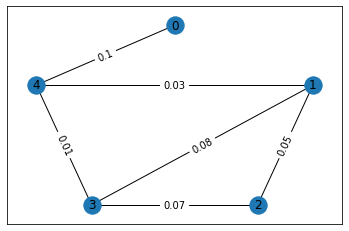

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node(0,pos=(5,10)) 
G.add_node(4,pos=(0,7))
G.add_node(3,pos=(2,1))
G.add_node(2,pos=(8,1))
G.add_node(1,pos=(10,7))
#G.add_edge(0,1,weight=0.1)
G.add_edge(0,4,weight=0.1)
G.add_edge(1,2,weight=0.05)
G.add_edge(1,3,weight=0.08)
G.add_edge(1,4,weight=0.03)
G.add_edge(2,3,weight=0.07)
G.add_edge(3,4,weight=0.01)
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

##Implementing NSGA-II algorithm


In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt

import time

problem = CollegeLife(student_list, g)

n_var = 50
X = 10*np.ones((1000, n_var))
algorithm = NSGA2(pop_size=1000, sampling=X)

# algorithm = NSGA2(pop_size=2000)

t1 = time.time()
res = minimize(problem,
               algorithm,
               ('n_gen', 350),  ## was 200 ## 120 giving good results
               seed=1,
               verbose=True)
t2 = time.time()

print("Time taken for NSGA: ", t2-t1)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")

# plot.figsize=(25,15)
# plot.show()

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |       1 |  1.65000E+02 |  1.65000E+02 |       1 |            - |            -
    2 |    1001 |  1.51987E+02 |  1.66994E+02 |       1 |  3.42961E+02 |        ideal
    3 |    2001 |  1.50491E+02 |  1.63915E+02 |       1 |  3.99555E+01 |        ideal
    4 |    3001 |  1.50132E+02 |  1.61896E+02 |       1 |  3.22209E+02 |        ideal
    5 |    4001 |  1.42287E+02 |  1.58213E+02 |       1 |  7.38051E+01 |        ideal
    6 |    5001 |  1.36492E+02 |  1.53891E+02 |       1 |  1.92029E+02 |        ideal
    7 |    6001 |  1.30080E+02 |  1.49040E+02 |       1 |  4.06179E+02 |        ideal
    8 |    7001 |  1.17045E+02 |  1.43304E+02 |       1 |  3.13787E+02 |        ideal
    9 |    8001 |  1.03253E+02 |  1.37058E+02 |       1 |  6.65130E+02 |        ideal
   10 |    9001 |  1.03253E+02 |  1.29885E+02 |       1 |  0.00000E+00 |            f
   11 |   10001 |  9.10554E+01 |  1.22427E+02 |       

In [ ]:
res.F.shape

(1000, 6)

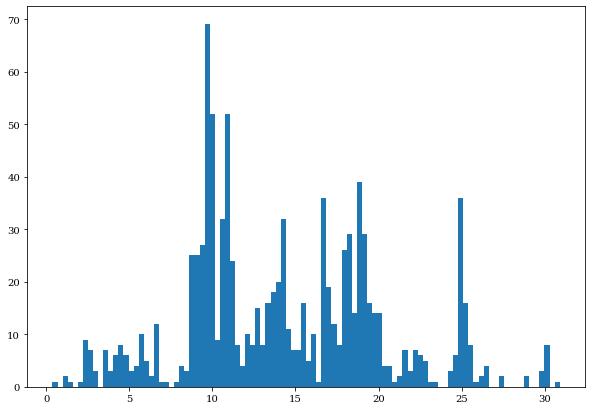

In [ ]:
## with pop size 2000, n_gen = 700
fig, ax = plt.subplots(figsize =(10, 7))
n, bins, patches = ax.hist(res.X[:,4], bins = 100)
plt.show()

In [ ]:
max_occ = bins[np.argmax(n)+1]
round(max_occ, 1)

9.8

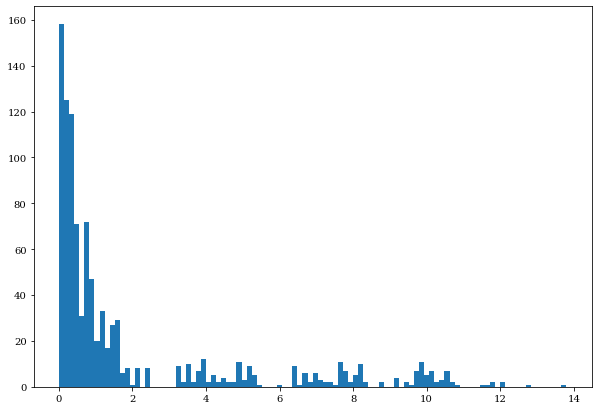

In [ ]:
## with pop size 2000, n_gen = 500
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(res.X[:,44], bins = 100)
plt.show()

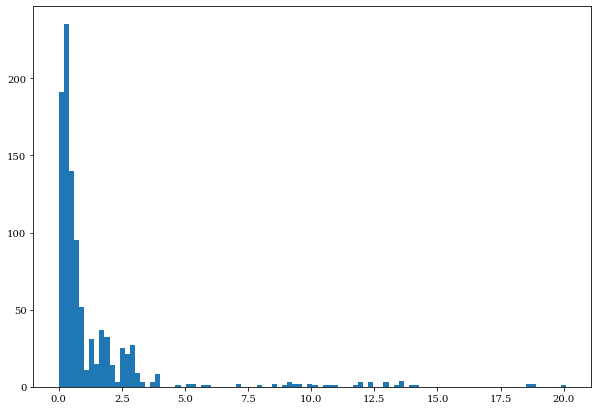

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(res.X[:,43], bins = 100)
# Show plot
plt.show()

## Topsis

In [ ]:
res.X.shape
optimalsol = res.X
pareto = res.F
res.F.shape

(1000, 6)

In [ ]:

def normalize(matrix):
    sq = np.square(matrix)
    sq_sum = np.sum(sq, axis=0)
    sqrt = np.sqrt(sq_sum)
    return matrix/sqrt

def TOPSIS(pareto_matrix, weights):
    normalized_mx = normalize(pareto_matrix)
    weighted_mx = normalized_mx*weights
    best_sol = np.max(weighted_mx, axis=0)
    worst_sol = np.min(weighted_mx, axis=0)
    diff_best = weighted_mx - best_sol
    diff_worst = weighted_mx - worst_sol
    sq_diff_best = np.square(diff_best) 
    sq_diff_worst = np.square(diff_worst)
    dist_best = np.sqrt(np.sum(sq_diff_best, axis=1))
    dist_worst = np.sqrt(np.sum(sq_diff_worst, axis=1))
    final_cost = dist_worst/(dist_best + dist_worst)
    ##print(final_cost)
    return np.argmax(final_cost)


In [ ]:
import pickle
path = '/content/drive/MyDrive/ME308 Project/saved_models/abswtsf_1000_500' 
with open(path, 'wb') as f:
    pickle.dump(res, f)

path = f'/content/drive/MyDrive/ME308 Project/saved_models/abswtsf_1000_500'
with open(path, 'rb') as f:
    res = pickle.load(f)
# you a hoe if you run this
print ("abswtsinfluence_1000_500")
optimalsol = res.X
pareto = res.F
w = np.linspace(1,1,6)
sol = TOPSIS(pareto,w)
for j in range(0,5):
 for i in g.adjacent_node_attribute(j):
  a,y=i
  identity = a
  

# Using First Thought on Weights

def printMatrix(s):

    for i in range(len(s)):
        print("%5d " % (s[i]), end="")
        if(i%10==9): 
          print("\n")  

from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# Add rows
this=[]
that=[]
n=0
for i in optimalsol[sol]:
 
 this.append(int(i))
 if(n%10==9):
   that.append(int((n+1)/10))
   that.extend(this)
   myTable.add_row(that)
   this=[]
   that=[]
 n=n+1
print(myTable)
# This is using max Distribution
ans=np.linspace(1,1,50)
for i in range(0,50):
 n, bins, patches = ax.hist(res.X[:,i], bins = 100)
 max_occ = bins[np.argmax(n)]
 ans[i]=max_occ
ans 
def printMatrix(s):

    for i in range(len(s)):
        print("%5d " % (s[i]), end="")
        if(i%10==9): 
          print("\n")  

from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# Add rows
this=[]
that=[]
n=0
for i in ans:
 
 this.append(int(i))
 if(n%10==9):
   that.append(int((n+1)/10))
   that.extend(this)
   myTable.add_row(that)
   this=[]
   that=[]
 n=n+1
print(myTable)

abswtsinfluence_1000_500
+------------+-------+--------+----------+------+------------+------------+----------------+------+---------+-------+
| Student ID | Acads | Sports | Research | PORs | Tech Teams | Tech Clubs | Non-Core Clubs | Cult | Leisure | Sleep |
+------------+-------+--------+----------+------+------------+------------+----------------+------+---------+-------+
|     1      |   31  |   0    |    2     |  4   |     13     |     13     |       6        |  9   |    16   |   38  |
|     2      |   49  |   0    |    59    |  1   |     0      |     1      |       0        |  1   |    10   |   47  |
|     3      |   21  |   22   |    1     |  7   |     0      |     0      |       4        |  4   |    16   |   49  |
|     4      |   31  |   2    |    13    |  4   |     0      |     7      |       2        |  0   |    13   |   46  |
|     5      |   18  |   0    |    0     |  2   |     7      |     1      |       0        |  35  |    13   |   51  |
+------------+-------+--------+

In [ ]:
# path = f'/content/drive/MyDrive/ME308 Project/saved_models/wtsu_1500_300_IMP.pkl'
# with open(path, 'rb') as f:
#     res = pickle.load(f)
# # you a hoe if you run this
# print ("wtsu_1500_300_IMP")
# optimalsol = res.X
# pareto = res.F
# w = np.linspace(1,1,6)
# sol = TOPSIS(pareto,w)
# for j in range(0,5):
#  for i in g.adjacent_node_attribute(j):
#   a,y=i
#   identity = a
  

# # Using First Thought on Weights

# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in optimalsol[sol]:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# # This is using max Distribution
# ans=np.linspace(1,1,50)
# for i in range(0,50):
#  n, bins, patches = ax.hist(res.X[:,i], bins = 100)
#  max_occ = bins[np.argmax(n)]
#  ans[i]=max_occ
# ans 
# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in ans:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# path = f'/content/drive/MyDrive/ME308 Project/saved_models/wtsu1_1500_500.pkl'
# with open(path, 'rb') as f:
#     res = pickle.load(f)
# # you a hoe if you run this
# optimalsol = res.X
# pareto = res.F
# print ("wtsu_1500_500")
# w = np.linspace(1,1,6)
# sol = TOPSIS(pareto,w)
# for j in range(0,5):
#  for i in g.adjacent_node_attribute(j):
#   a,y=i
#   identity = a
  

# # Using First Thought on Weights

# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in optimalsol[sol]:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# # This is using max Distribution 
# ans=np.linspace(1,1,50)
# for i in range(0,50):
#  n, bins, patches = ax.hist(res.X[:,i], bins = 100)
#  max_occ = bins[np.argmax(n)]
#  ans[i]=max_occ
# ans
# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in ans:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# path = f'/content/drive/MyDrive/ME308 Project/saved_models/wtsuf_1500_150.pkl'
# with open(path, 'rb') as f:
#     res = pickle.load(f)
# # you a hoe if you run this
# optimalsol = res.X
# pareto = res.F
# print ("wtsf_1500_150")
# w = np.linspace(1,1,6)
# sol = TOPSIS(pareto,w)
# for j in range(0,5):
#  for i in g.adjacent_node_attribute(j):
#   a,y=i
#   identity = a
  

# # Using First Thought on Weights

# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in optimalsol[sol]:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# # This is using max Distribution 
# ans=np.linspace(1,1,50)
# for i in range(0,50):
#  n, bins, patches = ax.hist(res.X[:,i], bins = 100)
#  max_occ = bins[np.argmax(n)]
#  ans[i]=max_occ
# ans
# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in ans:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# path = f'/content/drive/MyDrive/ME308 Project/saved_models/wtsf_1500_200.pkl'
# with open(path, 'rb') as f:
#     res = pickle.load(f)
# # you a hoe if you run this
# optimalsol = res.X
# pareto = res.F
# print ("wtsf_1500_200")
# w = np.linspace(1,1,6)
# sol = TOPSIS(pareto,w)
# for j in range(0,5):
#  for i in g.adjacent_node_attribute(j):
#   a,y=i
#   identity = a
  

# # Using First Thought on Weights

# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in optimalsol[sol]:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# # This is using max Distribution
# ans=np.linspace(1,1,50)
# for i in range(0,50):
#  n, bins, patches = ax.hist(res.X[:,i], bins = 100)
#  max_occ = bins[np.argmax(n)]
#  ans[i]=max_occ
# ans 
# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in ans:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# path = f'/content/drive/MyDrive/ME308 Project/saved_models/wtsf_1500_350.pkl'
# with open(path, 'rb') as f:
#     res = pickle.load(f)
# # you a hoe if you run this
# optimalsol = res.X
# pareto = res.F
# print ("wtsf_1500_350")
# w = np.linspace(1,1,6)
# sol = TOPSIS(pareto,w)
# for j in range(0,5):
#  for i in g.adjacent_node_attribute(j):
#   a,y=i
#   identity = a
  

# # Using First Thought on Weights

# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in optimalsol[sol]:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
# # This is using max Distribution 
# ans=np.linspace(1,1,50)
# for i in range(0,50):
#  n, bins, patches = ax.hist(res.X[:,i], bins = 100)
#  max_occ = bins[np.argmax(n)]
#  ans[i]=max_occ
# ans
# def printMatrix(s):

#     for i in range(len(s)):
#         print("%5d " % (s[i]), end="")
#         if(i%10==9): 
#           print("\n")  

# from prettytable import PrettyTable
 
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["Student ID","Acads", "Sports", "Research", "PORs","Tech Teams","Tech Clubs","Non-Core Clubs","Cult","Leisure","Sleep"])

# # Add rows
# this=[]
# that=[]
# n=0
# for i in ans:
 
#  this.append(int(i))
#  if(n%10==9):
#    that.append(int((n+1)/10))
#    that.extend(this)
#    myTable.add_row(that)
#    this=[]
#    that=[]
#  n=n+1
# print(myTable)
